In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
pokemon = pd.read_csv("../data/pokemon_challenge/pokemon.csv", index_col='#')

In [4]:
combats = pd.read_csv("../data/pokemon_challenge/combats.csv")

In [5]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [8]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [9]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [10]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [11]:
#comparación entre categorías

In [13]:
pk_colors = [
    "#A8B820",  # Bug,
    "#705848",  # Dark,
    "#7038F8",  # Dragon
    "#F8D030",  # Electric
    "#EE99AC",  # Fairy
    "#C03028",  # Fighting
    "#F08030",  # Fire
    "#A890F0",  # Flying
    "#705898",  # Ghost
    "#78C850",  # Grass
    "#E0C068",  # Ground
    "#98D8D8",  # Ice
    "#A8A878",  # Normal
    "#A040A0",  # Poison
    "#F85888",  # Psychic
    "#B8A038",  # Rock
    "#B8B8D0",  # Steel
    "#6890F0",  # Water
]

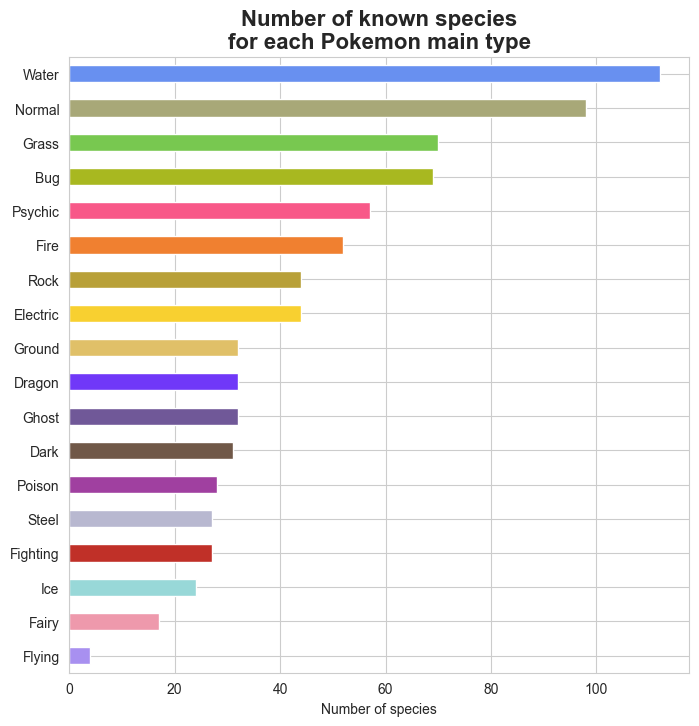

In [18]:
pkt_cnt = pokemon["Type 1"].value_counts(sort=False).sort_index()
pkt_cnt = pd.concat(
    [pkt_cnt, pd.DataFrame(pk_colors, index=pkt_cnt.index, columns=["Colors"])], axis=1
)
pkt_cnt.sort_values("Type 1", inplace=True)
pkt_cnt_bar = pkt_cnt.plot(
    kind="barh", y="Type 1", color=pkt_cnt.Colors, legend=False, figsize=(8, 8)
)
pkt_cnt_bar.set_title(
    "Number of known species\nfor each Pokemon main type", fontsize=16, weight="bold"
)
pkt_cnt_bar.set_xlabel("Number of species")
plt.show()

In [22]:
pkt = pokemon.pivot_table(
    index="Type 1",
    values=["Attack", "Defense", "HP", "Sp. Atk", "Sp. Def", "Speed"],
    aggfunc="mean",
)
pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235


In [30]:
pkt["Total_Power"] = pkt.iloc[:,range(6)].sum(axis=1)
pkt["Color"] = pk_colors
pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed,Total_Power,Color
Type 1,,,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159,378.927536,#A8B820
Poison,74.678571,68.821429,67.250000,60.428571,64.392857,63.571429,399.142857,#705848
Normal,73.469388,59.846939,77.275510,55.816327,63.724490,71.551020,401.683673,#7038F8
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235,413.176471,#F8D030
Fighting,96.777778,65.925926,69.851852,53.111111,64.703704,66.074074,416.444444,#EE99AC


Text(0.5, 1.0, 'Mean Total Power for each Pokemon Main Type')

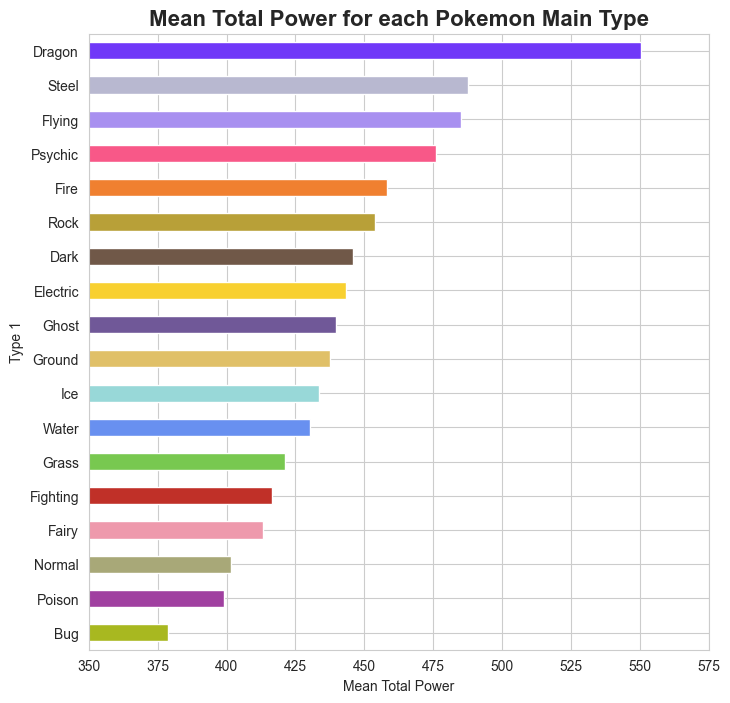

In [28]:
pkt.sort_values("Total_Power", ascending=True, inplace=True)
pkt_bar = pkt.plot(
    kind="barh", y="Total_Power", figsize=(8, 8), color=pkt.Color, legend=False
)
pkt_bar.set_xlim((350, 575))
pkt_bar.set_xlabel("Mean Total Power")
pkt_bar.set_title(
    "Mean Total Power for each Pokemon Main Type", fontsize=16, weight="bold"
)